<a href="https://colab.research.google.com/github/carlosmend/Artificial-Neural-Networks/blob/main/Natural_Scenes_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Roberto Carlos Mendoza Giraldo

In [ ]:
! wget https://github.com/lonperman/dataset-naturaleza/archive/refs/heads/main.zip

In [ ]:
!unzip main.zip

In [ ]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf
import os,cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input, Dropout

Reading folders...

In [ ]:

paths=['dataset-naturaleza-main/seg_train/seg_train','dataset-naturaleza-main/seg_test/seg_test']
labels = []
for folder in os.listdir(paths[0]):
    labels.append(folder)

print(labels)


['sea', 'buildings', 'mountain', 'glacier', 'street', 'forest']


In [ ]:
dicc_labels={i:labels[i] for i in range(0,len(labels))}
dicc_labels

{0: 'sea',
 1: 'buildings',
 2: 'mountain',
 3: 'glacier',
 4: 'street',
 5: 'forest'}

Resize image (150,150)->(80,80)

In [ ]:
n=[]
s=80
_images=[]
_labels=[]
for j in range(0,2):
  for i,folder in enumerate(labels):
      try:
          for image in os.listdir(paths[j] +'/'+folder):
              img = os.path.join(paths[j]+'/'+folder+'/'+image)
              img = cv2.imread(img)
              img = cv2.resize(img,(s,s))
              #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #if you want to use scale gray
              _images.append(img)
              _labels.append(i)
      except:
          print("siuu")
  n.append(len(_images))

_images = np.asarray(_images)
_labels = np.asarray(_labels).astype('int64')
print("imagenes-> ",_images.shape)
print("cantidad de datos por label-> ",np.bincount(_labels))

imagenes->  (17034, 80, 80, 3)
cantidad de datos por label->  [2784 2628 3037 2957 2883 2745]


Scale the imges so that the CNN works faster
* I think StandarScaler() is better than MinMaxScaler() for scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler() #Instancia
_images =_images.reshape((len(_images),-1))
scal.fit(_images) #Entrenamiento
_images_scal = scal.transform(_images) #Genera el nuevo dataset


split array into train and test subsets.

In [ ]:
from keras.utils import to_categorical

X_train=_images_scal[0:n[0]]
X_test=_images_scal[n[0]:n[1]]

y_train=_labels[0:n[0]]
y_test=_labels[n[0]:n[1]]


X_train =X_train.reshape(len(X_train),s,s,3)
X_test = X_test.reshape(len(X_test),s,s,3)

print("imagenes train-> ",X_train.shape,"labels train-> ",y_train.shape)
print("labels train por categoría-> ",np.bincount(y_train))
print("imagenes test-> ",X_test.shape,"labels train-> ",y_test.shape)
print("label test por categoría-> ",np.bincount(y_test))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


imagenes train->  (14034, 80, 80, 3) labels train->  (14034,)
labels train por categoría->  [2274 2191 2512 2404 2382 2271]
imagenes test->  (3000, 80, 80, 3) labels train->  (3000,)
label test por categoría->  [510 437 525 553 501 474]


Model CNN 

In [ ]:
modelo = Sequential()
modelo.add(Input(shape=(s,s,3)))
modelo.add(Convolution2D(s, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Convolution2D(s*2, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Convolution2D(s/2, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Flatten())
modelo.add(Dropout(0.5))
modelo.add(Dense(6, activation="softmax"))

modelo.compile(optimizer="adam", loss="categorical_crossentropy",
               metrics=["accuracy","Precision"]
)

modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 80)        2240      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 80)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 160)       115360    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 160)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 40)        57640     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 40)        

Epoch 1/100
14/14 [==============================] - 8s 508ms/step - loss: 1.4734 - accuracy: 0.4082 - precision: 0.6741
Epoch 2/100
14/14 [==============================] - 7s 518ms/step - loss: 1.0914 - accuracy: 0.5747 - precision: 0.7276
Epoch 3/100
14/14 [==============================] - 7s 529ms/step - loss: 0.9288 - accuracy: 0.6494 - precision: 0.7477
Epoch 4/100
14/14 [==============================] - 7s 533ms/step - loss: 0.8446 - accuracy: 0.6820 - precision: 0.7665
Epoch 5/100
14/14 [==============================] - 7s 528ms/step - loss: 0.7892 - accuracy: 0.7084 - precision: 0.7842
Epoch 6/100
14/14 [==============================] - 7s 522ms/step - loss: 0.7569 - accuracy: 0.7246 - precision: 0.7928
Epoch 7/100
14/14 [==============================] - 7s 517ms/step - loss: 0.6931 - accuracy: 0.7482 - precision: 0.8059
Epoch 8/100
14/14 [==============================] - 7s 515ms/step - loss: 0.6505 - accuracy: 0.7638 - precision: 0.8183
Epoch 9/100
14/14 [=============

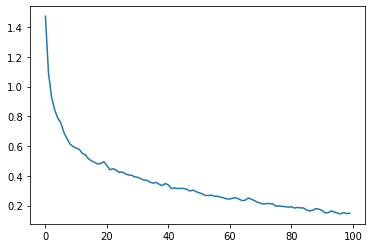

In [ ]:
historial=modelo.fit(X_train, y_train, validation_batch_size=(X_test,y_test),epochs=100,batch_size=1024)
plt.plot(historial.history["loss"])



Classification report
* precision, recall, f1-score 87%

In [ ]:
print(dicc_labels)
pred = modelo.predict(X_test)
print(classification_report(
    np.argmax(y_test,axis=1),
    np.argmax(pred, axis=1)
))

{0: 'sea', 1: 'buildings', 2: 'mountain', 3: 'glacier', 4: 'street', 5: 'forest'}
94/94 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       510
           1       0.83      0.84      0.84       437
           2       0.81      0.84      0.82       525
           3       0.85      0.80      0.83       553
           4       0.87      0.86      0.87       501
           5       0.96      0.96      0.96       474

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



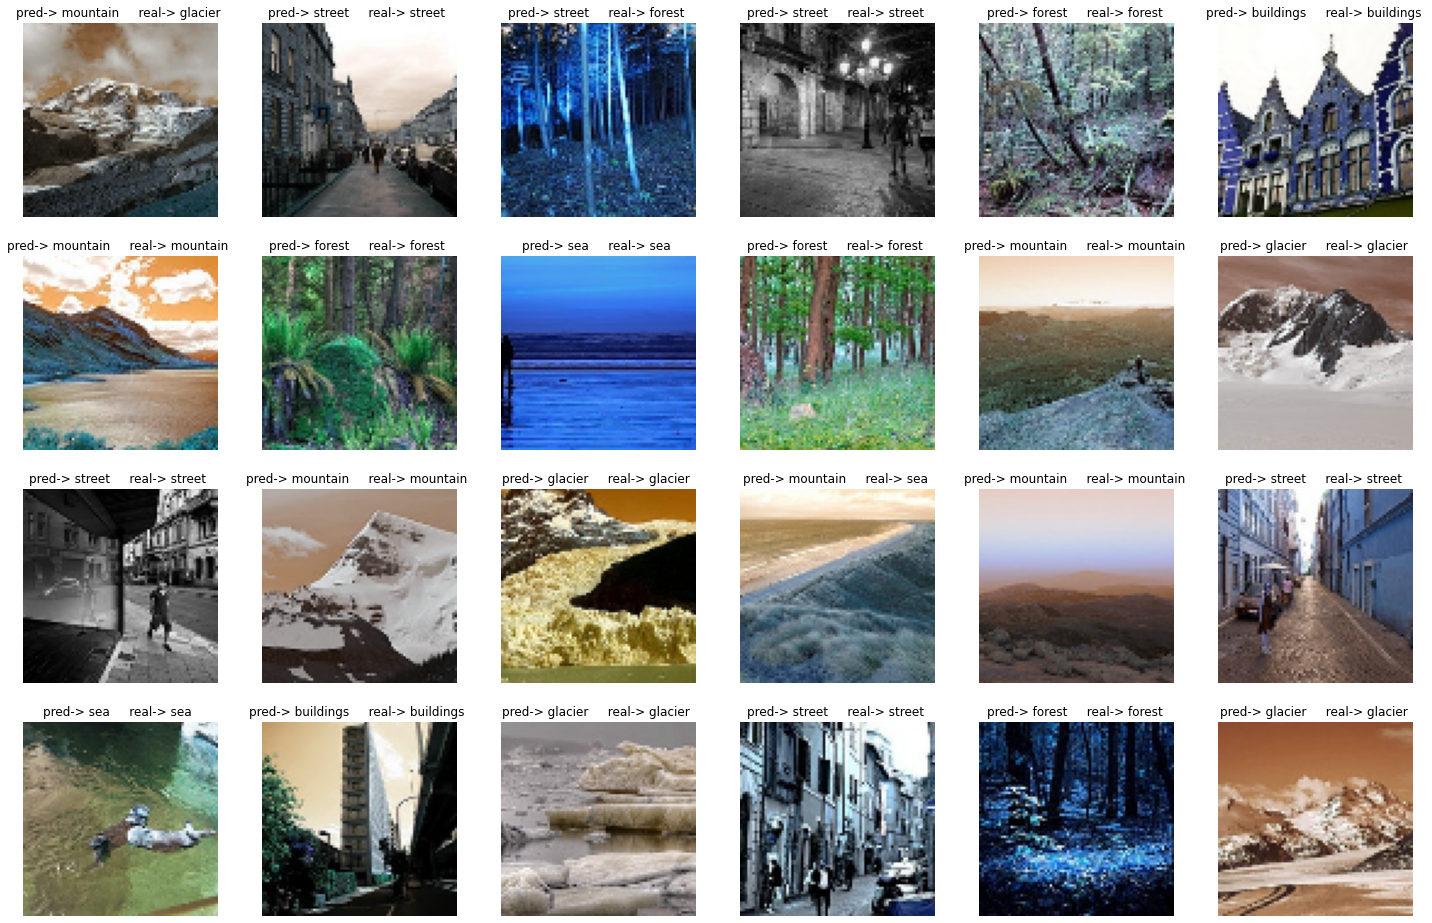

In [ ]:

_images =_images.reshape(len(_images),s,s,3)
plt.figure(figsize=(25,25))
for i in range(0,24):
    pos= random.randint(0, 2999)
    plt.subplot(6,6,i+1)
    plt.imshow(_images[n[0]+pos])    
    plt.axis('off')
    plt.title("pred-> %s     real-> %s "%(dicc_labels[np.argmax(pred[pos])],dicc_labels[np.argmax(y_test[pos])]))

I think the accuracy is not 100% because there is ambiguity in some data, also glacier and mountain have similar shape.




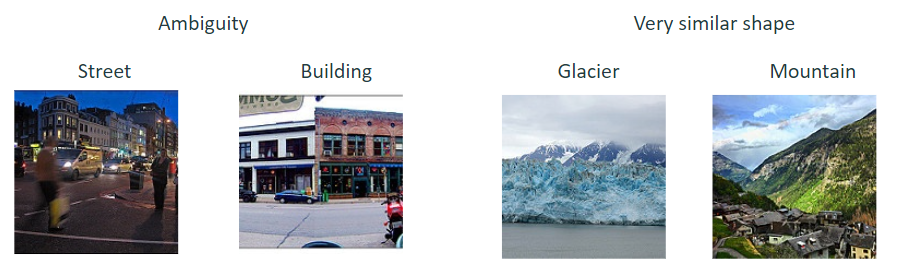